# **About The Data**
The data is related to direct marketing campaigns of a financial institution.The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was
required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no')
subscribed. You will have to analyze the dataset in order to find ways to look for future
strategies in order to improve future marketing campaigns for the bank.

In [ ]:
# Importing libraries
import pandas as pd
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df_train = pd.read_csv('/content/ML Marathon.csv')
df_test = pd.read_csv('/content/ML Marathon test.csv')

In [ ]:
# Joining the two dataframes
#https://www.kaggle.com/datasets/dev523/ml-marathon-dataset-by-azure-developer-community?select=test_data.csv
df = pd.concat([df_train, df_test], axis = 0)

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no
5,40,admin.,married,secondary,no,-666,yes,no,unknown,27,may,107,2,-1,0,unknown,no
6,54,technician,married,secondary,no,0,no,no,telephone,5,feb,744,3,-1,0,unknown,yes
7,48,blue-collar,married,secondary,no,1730,yes,no,cellular,4,may,361,1,89,3,success,yes
8,29,management,single,unknown,no,560,no,no,cellular,5,apr,459,1,307,1,failure,yes
9,52,services,married,secondary,no,431,no,no,cellular,26,aug,73,17,-1,0,unknown,no


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 2790
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [ ]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
df.pdays.unique()

array([ 50,  -1, 263, 251,  89, 307,  92, 227, 101,  99, 122, 181, 330,
        94,  97, 341, 778,  85, 149, 412, 347, 370, 174, 343, 193, 179,
       177, 182, 126, 339, 328, 223,  84, 267, 104, 301, 368,  93, 230,
       298, 313,  64, 100, 336, 334, 183,  83, 302, 123, 300, 352, 504,
       190, 213, 127,  90, 371,  70, 272,  86, 245, 287, 281,   1, 195,
       148,  98, 201,  91,  95, 346, 332, 296,  88, 189, 102, 350, 457,
       200, 342, 120, 458, 224, 205, 357, 180, 196, 361,  75, 392,  96,
       170, 111, 105, 349, 435, 176, 362, 184,  62, 326, 178, 237, 312,
       259,   6,   2, 329, 337,  28, 265, 436, 257, 323, 351, 236, 404,
        38, 242, 280, 169, 290, 103,  87, 331, 278, 106, 140, 335, 551,
        40,  80, 165, 345, 364, 358, 311, 247, 587, 135, 203, 474, 194,
       460,  27, 407, 197, 229,  63, 340, 414, 310, 264,  69, 175, 185,
       186, 462, 518, 306, 202, 535, 782, 262, 359, 134, 212, 161, 150,
       275, 173, 297, 515, 355, 133, 279, 271, 491,  78, 113, 17

In [ ]:
# Fixing pdays negative values
df['pdays'] = df.pdays.astype(str).apply(lambda ch: ch.replace('-1', '1')).astype('int64')

In [ ]:
serie =  abs(df.loc[:, 'balance'])

In [ ]:
df.loc[:,'balance'] = serie

In [ ]:
# Replacing abbreviated months with numbers
for index, row in df.iterrows():
  df.at[index, 'month'] = row['month'].title()

In [ ]:
import calendar
abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}

In [ ]:
abbr_to_num

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [ ]:
df.month = df.month.map(abbr_to_num).astype(int)

In [ ]:
df.deposit.fillna(df.deposit.mode()[0], inplace = True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,11,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,7,203,5,1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,5,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,5,549,1,1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,5,404,2,251,6,failure,no


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df_ass = df[['education', 'job', 'marital', 'contact', 'poutcome']]

# **Explaining Features Meanings :**
1 - age (numeric)

2 - job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','
student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)

4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unk
nown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance:

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should
only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

Output variable (desired target):
17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

# **Visualization**

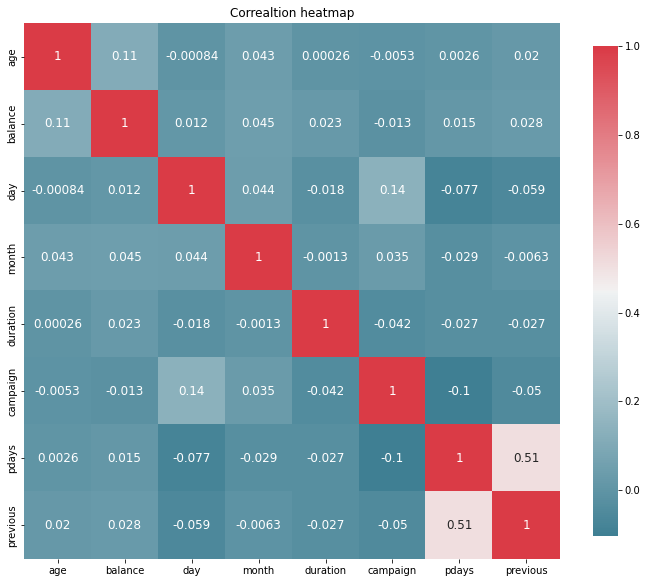

In [ ]:
def plot_correlation_map(df):
    corr = df.corr()
    s,ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, cmap = cmap,
        square=True, cbar_kws={ 'shrink' : 0.9 }, 
     annot = True, annot_kws = { 'fontsize' : 12 }
)
plot_correlation_map(df)
plt.title('Correaltion heatmap');

In [ ]:
df['balance'].describe()

count    11162.000000
mean      1568.461656
std       3206.188164
min          0.000000
25%        171.000000
50%        568.000000
75%       1713.750000
max      81204.000000
Name: balance, dtype: float64

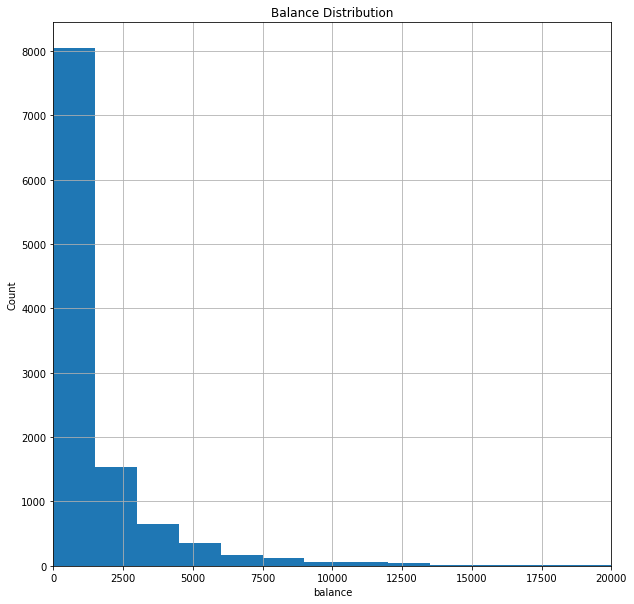

In [ ]:
plt.figure(figsize = (10,10))
bins = np.arange(0, df.balance.max() + 2000, 1500)
df['balance'].hist(bins = bins)
plt.xlabel('balance')
plt.ylabel('Count')
plt.xlim((0,20000))
plt.title('Balance Distribution');

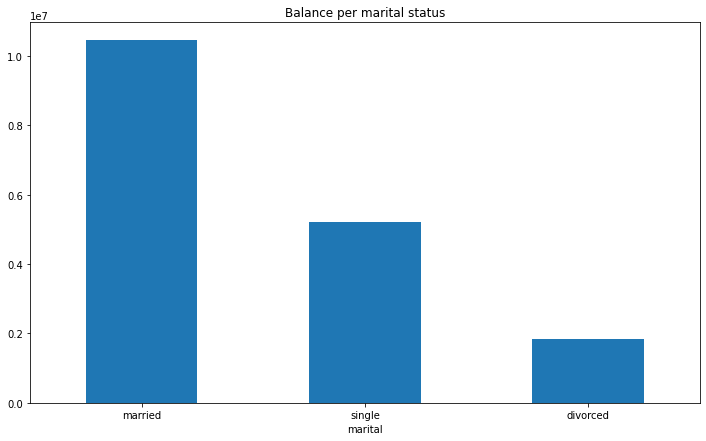

In [ ]:
plt.figure(figsize = (12,7))
df.groupby('marital')['balance'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Balance per marital status');

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,11,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,7,203,5,1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,5,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,5,549,1,1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,5,404,2,251,6,failure,no
5,40,admin.,married,secondary,no,666,yes,no,unknown,27,5,107,2,1,0,unknown,no
6,54,technician,married,secondary,no,0,no,no,telephone,5,2,744,3,1,0,unknown,yes
7,48,blue-collar,married,secondary,no,1730,yes,no,cellular,4,5,361,1,89,3,success,yes
8,29,management,single,unknown,no,560,no,no,cellular,5,6,459,1,307,1,failure,yes
9,52,services,married,secondary,no,431,no,no,cellular,26,5,73,17,1,0,unknown,no


In [ ]:
base_color = sns.color_palette()[0]
order = df['job'].value_counts().index

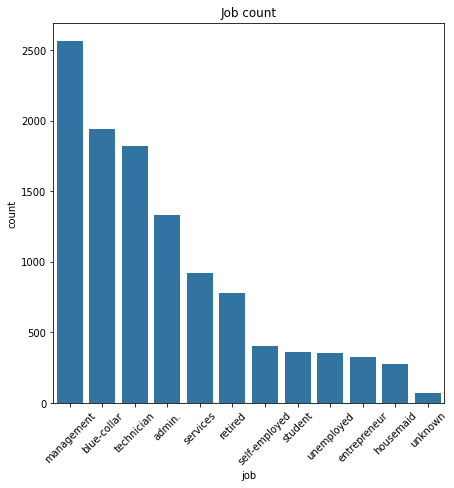

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'job', data = df, color = base_color, order = order);
plt.xticks(rotation = 45)
plt.title('Job count');

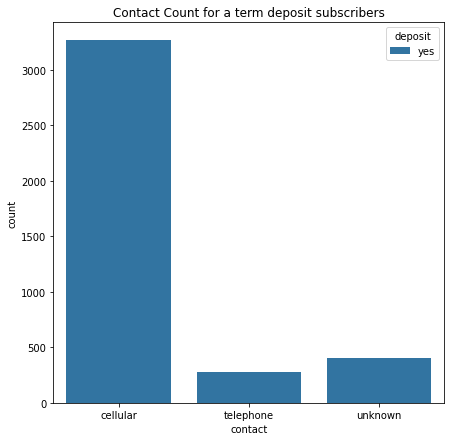

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'contact', data = df[df['deposit']== 'yes'], hue = 'deposit')
plt.title('Contact Count for a term deposit subscribers');

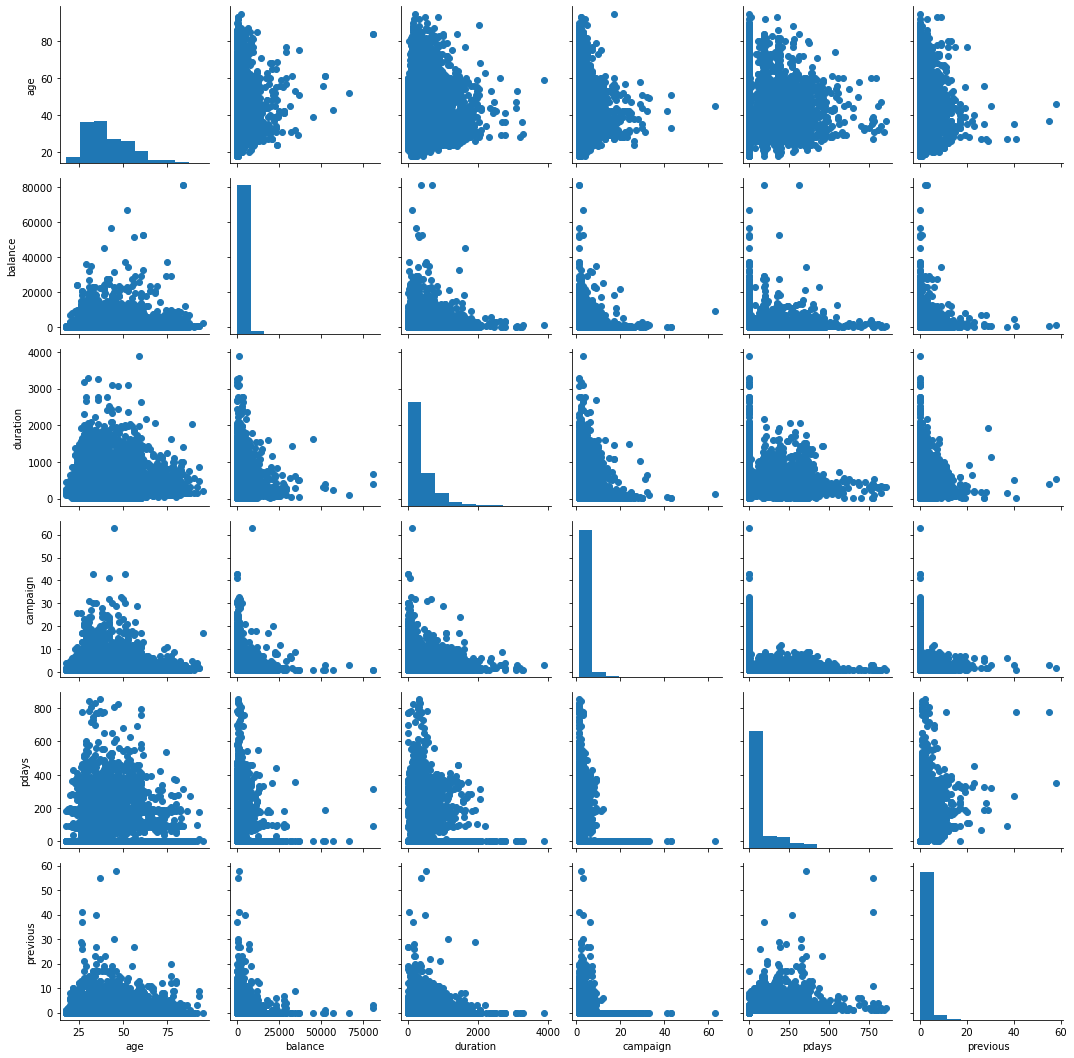

In [ ]:
g = sns.PairGrid(data = df.drop(['month', 'day'], axis = 1))
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

<Figure size 720x504 with 0 Axes>

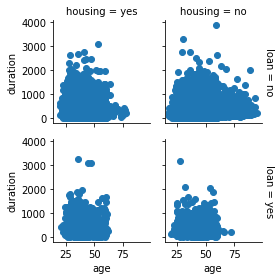

In [ ]:
plt.figure(figsize = (10,7))
g = sns.FacetGrid(data = df, col = 'housing', row = 'loan', height = 2, margin_titles = True)
g.map(plt.scatter, 'age', 'duration')

<Figure size 720x504 with 0 Axes>

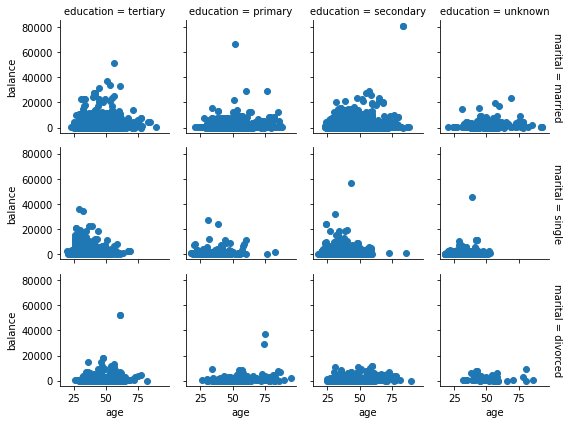

In [ ]:
plt.figure(figsize = (10,7))
g = sns.FacetGrid(data = df, col = 'education', row = 'marital', height = 2, margin_titles = True)
g.map(plt.scatter, 'age', 'balance')

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
69,41,management,divorced,tertiary,no,3426,no,no,cellular,4,6,102,2,297,3,failure,no
2095,56,management,divorced,tertiary,no,3287,no,no,cellular,27,2,497,1,1,0,unknown,yes
5127,47,admin.,single,secondary,no,3531,yes,no,cellular,7,7,49,6,1,0,unknown,no
5092,41,technician,married,secondary,no,378,yes,no,cellular,5,2,361,1,253,2,failure,no
1910,41,technician,married,tertiary,no,63,no,no,cellular,25,8,36,3,1,0,unknown,no


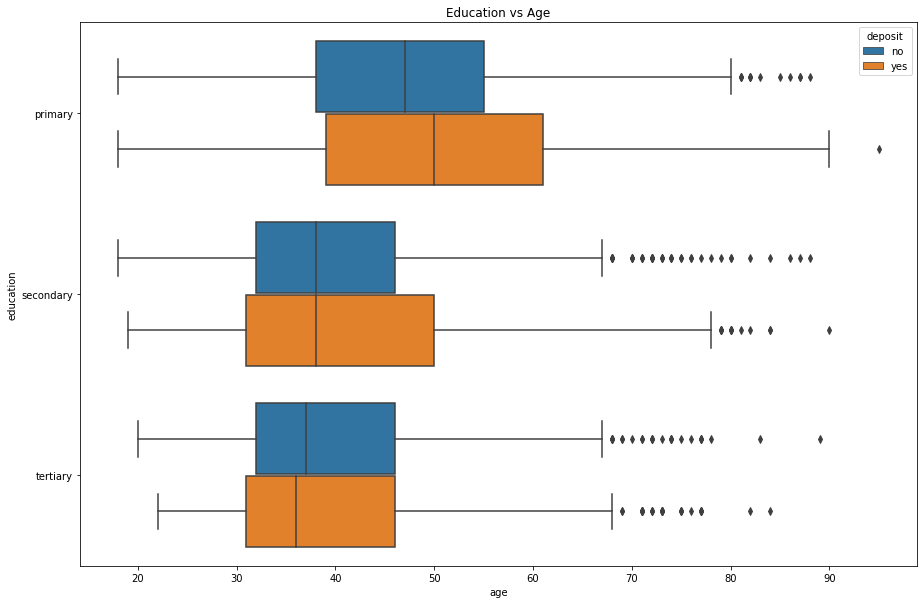

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'age', y = 'education', order = ['primary', 'secondary', 'tertiary'], hue='deposit')
plt.title('Education vs Age');

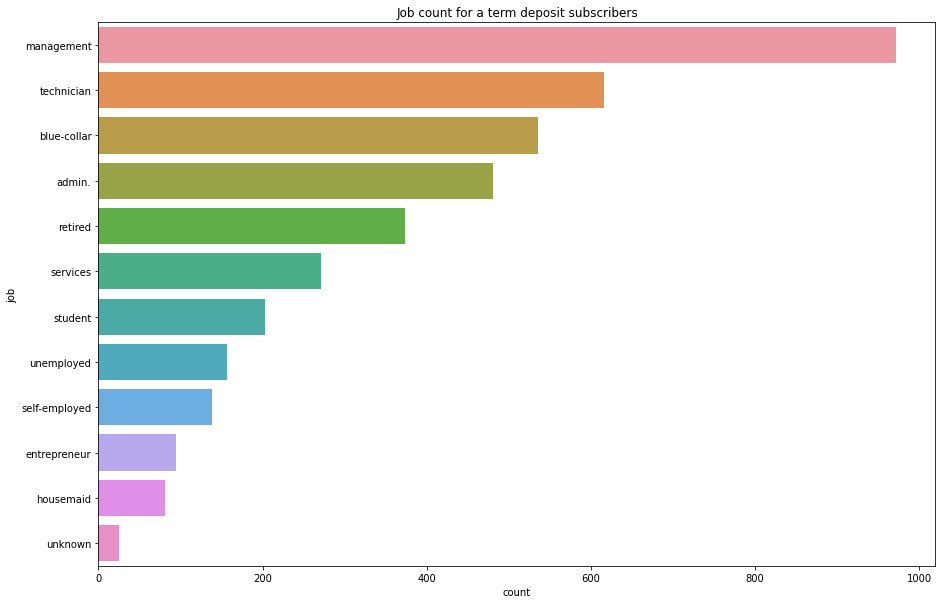

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data = df[df['deposit']=='yes'], y = 'job', order = df[df['deposit']=='yes'].job.value_counts().index)
plt.title('Job count for a term deposit subscribers');

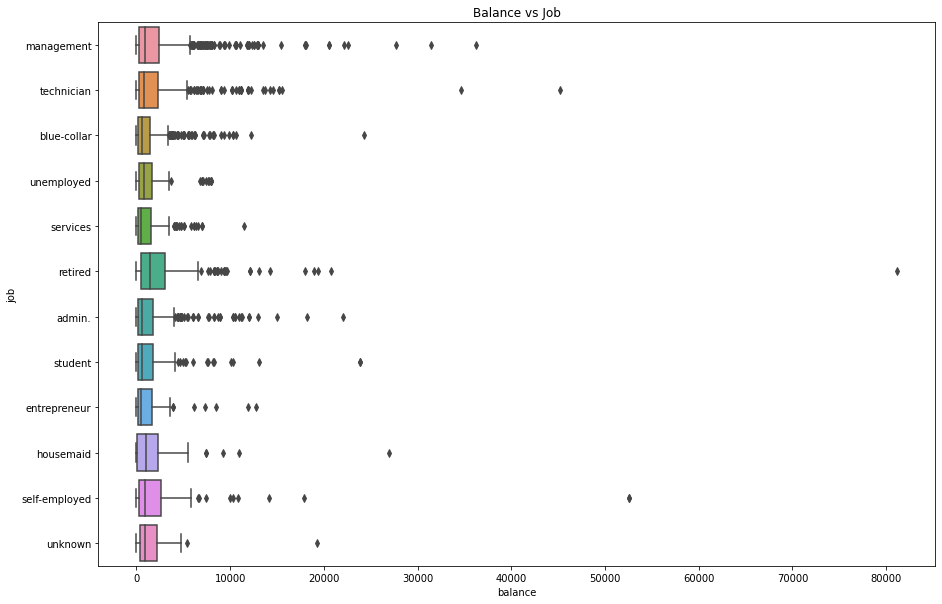

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df[df['deposit']=='yes'], x = 'balance', y = 'job')
plt.title('Balance vs Job');

In [ ]:
df.query("balance > 40000")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
248,84,retired,married,secondary,no,81204,no,no,telephone,28,8,679,1,313,2,other,yes
1263,52,blue-collar,married,primary,no,66653,no,no,cellular,14,7,109,3,1,0,unknown,no
2412,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,10,290,1,1,0,unknown,yes
3109,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,7,325,1,1,0,unknown,no
5208,43,admin.,single,secondary,no,56831,no,no,unknown,15,5,243,1,1,0,unknown,no
5283,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,2,394,3,189,1,success,yes
6644,39,technician,single,unknown,no,45248,yes,no,unknown,6,5,1623,1,1,0,unknown,yes
576,84,retired,married,secondary,no,81204,no,no,telephone,1,4,390,1,94,3,success,no


In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

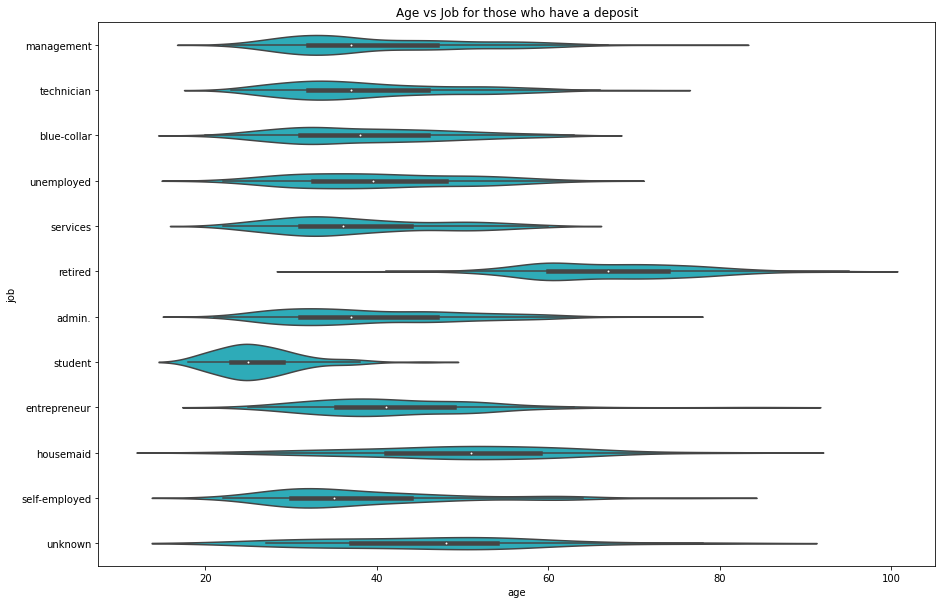

In [ ]:
plt.figure(figsize = (15,10))
sns.violinplot(data = df[df['deposit']=='yes'], x = 'age', y = 'job', color = sns.color_palette()[9])
plt.title('Age vs Job for those who have a deposit');

In [ ]:
df = df.query("balance < 40000")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,11,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,7,203,5,1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,5,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,5,549,1,1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,5,404,2,251,6,failure,no


# **Extracting new features and encoding the variables**

In [ ]:
# Use also get dummies for one hot encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.job = encoder.fit_transform(df.job)
df.marital = encoder.fit_transform(df.marital)
df.education = encoder.fit_transform(df.education)
df.contact = encoder.fit_transform(df.contact)
df.poutcome = encoder.fit_transform(df.poutcome)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.default = df.default.map({'no' : 0, 'yes' : 1})
df.deposit = df.deposit.map({'no' : 0, 'yes' : 1})
df.housing = df.housing.map({'no' : 0, 'yes' : 1})
df.loan = df.loan.map({'no' : 0, 'yes' : 1})

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
np.sort(df.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [ ]:
base_color = sns.color_palette()[0]

In [ ]:
#https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
months_per_year = 12
days_per_month = 31
df['sin_month'] = np.sin(2*np.pi*df.month/months_per_year)
df['cos_month'] = np.cos(2*np.pi*df.month/months_per_year)
df['cos_day'] = np.cos(2*np.pi*df.day/days_per_month)
df['sin_day'] = np.sin(2*np.pi*df.day/days_per_month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

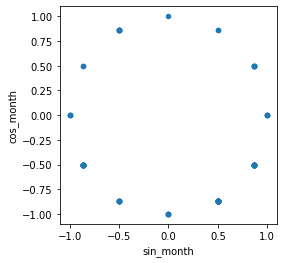

In [ ]:
df.sample(100).plot.scatter('sin_month','cos_month').set_aspect('equal');

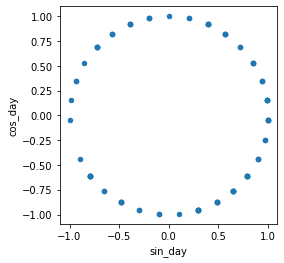

In [ ]:
df.sample(100).plot.scatter('sin_day','cos_day').set_aspect('equal');

In [ ]:
#df.drop(['day', 'month'], axis = 1, inplace = True)

# **Modeling**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'sin_month', 'cos_month', 'cos_day',
       'sin_day'],
      dtype='object')

In [ ]:
x = df[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'balance', 'campaign', 'previous',
       'poutcome', 'pdays', 'month','duration', 'day', 'sin_day','cos_day', 'sin_month','cos_month']]
y = df['deposit']

In [ ]:
model = LogisticRegression()
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
score = model.score(x_train,y_train)
print(score)

0.7063767791101647


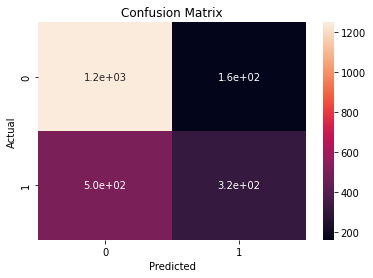

In [ ]:
confusion_matrix = pd.crosstab(y_test, predicted, rownames=['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)
plt.title('Confusion Matrix');

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1411
           1       0.66      0.38      0.49       820

    accuracy                           0.70      2231
   macro avg       0.69      0.63      0.64      2231
weighted avg       0.69      0.70      0.68      2231



# **KNN**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'sin_month', 'cos_month', 'cos_day',
       'sin_day'],
      dtype='object')

In [ ]:
x = df[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'duration', 'balance', 'campaign', 'previous',
       'poutcome', 'pdays', 'sin_month', 'cos_month', 'cos_day', 'sin_day']]
y = df['deposit']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score = []
for k in range(1,30):
  Knn = KNeighborsClassifier(n_neighbors = k)
  Knn.fit(x_train, y_train)
  predicted = Knn.predict(x_test)
  print("Accuracy for k = ", k, 'is', round(accuracy_score(predicted, y_test), 2))
  score.append(round(accuracy_score(predicted, y_test), 2))

Accuracy for k =  1 is 0.65
Accuracy for k =  2 is 0.65
Accuracy for k =  3 is 0.67
Accuracy for k =  4 is 0.67
Accuracy for k =  5 is 0.69
Accuracy for k =  6 is 0.68
Accuracy for k =  7 is 0.69
Accuracy for k =  8 is 0.68
Accuracy for k =  9 is 0.68
Accuracy for k =  10 is 0.69
Accuracy for k =  11 is 0.69
Accuracy for k =  12 is 0.69
Accuracy for k =  13 is 0.69
Accuracy for k =  14 is 0.69
Accuracy for k =  15 is 0.7
Accuracy for k =  16 is 0.69
Accuracy for k =  17 is 0.7
Accuracy for k =  18 is 0.7
Accuracy for k =  19 is 0.71
Accuracy for k =  20 is 0.71
Accuracy for k =  21 is 0.71
Accuracy for k =  22 is 0.7
Accuracy for k =  23 is 0.71
Accuracy for k =  24 is 0.7
Accuracy for k =  25 is 0.7
Accuracy for k =  26 is 0.7
Accuracy for k =  27 is 0.71
Accuracy for k =  28 is 0.7
Accuracy for k =  29 is 0.7


Text(0.5, 1.0, 'The best optimal k-value')

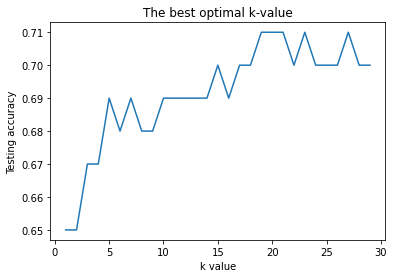

In [ ]:
plt.plot(range(1,30), score)
plt.xlabel('k value')
plt.ylabel('Testing accuracy')
plt.title('The best optimal k-value')

As we can see 19 is the best optimal k value

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree_model = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

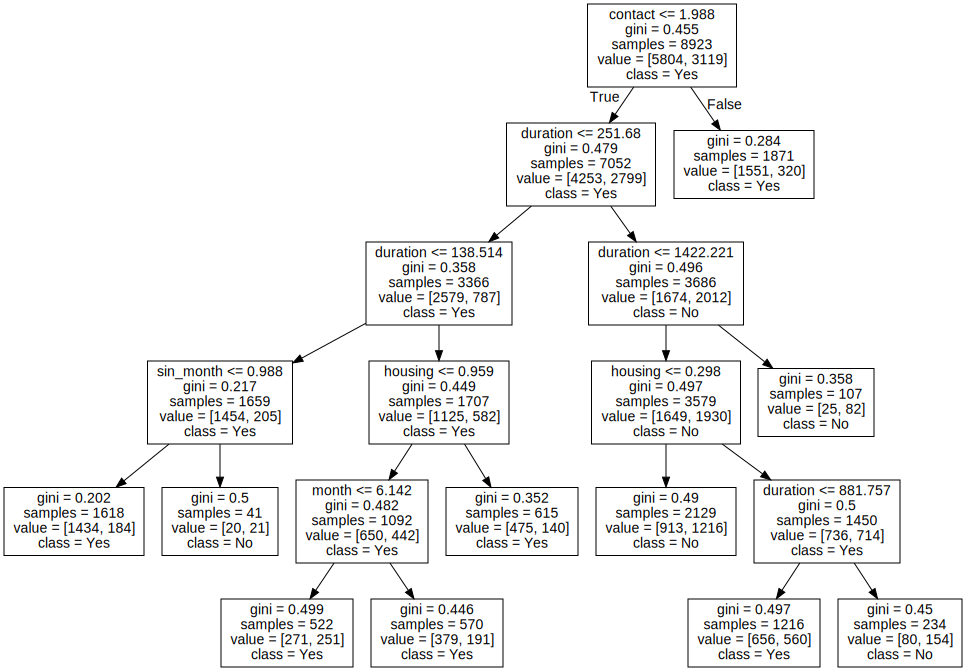

In [ ]:
import graphviz
name = list(x_train.columns.values)
dot_data = tree.export_graphviz(tree_model, out_file = None, feature_names = name, class_names = ['Yes', 'No'])
graph = graphviz.Source(dot_data)
graph.render('data')
graph

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7014791573285523


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7288211564320932


# **Cross Validation | Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
  scores = cross_val_score(clf, x, y, cv = i)
  print('Average accuracy', np.sum(scores/i))

Average accuracy 0.718307333691949
Average accuracy 0.71382463690156
Average accuracy 0.7191963727659338
Average accuracy 0.7186599345142741
Average accuracy 0.7279899587591896
Average accuracy 0.7262718559318094
Average accuracy 0.7270833654731235
Average accuracy 0.7264527121826192


The best optimal number of folds is 7 with 15 estimators for the model

In [ ]:
for i in range(2,15):
  scores = cross_val_score(tree_model, x, y, cv = i)
  print('Average accuracy', round(np.sum(scores/i) * 100, 1), '%')

Average accuracy 70.2 %
Average accuracy 69.3 %
Average accuracy 70.4 %
Average accuracy 69.5 %
Average accuracy 71.1 %
Average accuracy 69.1 %
Average accuracy 69.8 %
Average accuracy 70.0 %
Average accuracy 71.2 %
Average accuracy 70.5 %
Average accuracy 69.4 %
Average accuracy 71.0 %
Average accuracy 72.0 %


## **Unsuperervised Learning | Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
agg = AgglomerativeClustering(n_clusters = 2, affinity = 'Euclidean', linkage = 'complete')
df_clust = df.drop('deposit', axis = 1)
clust_labels = agg.fit_predict(df_clust)

In [ ]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
11149,1
11150,1
11151,1
11152,1


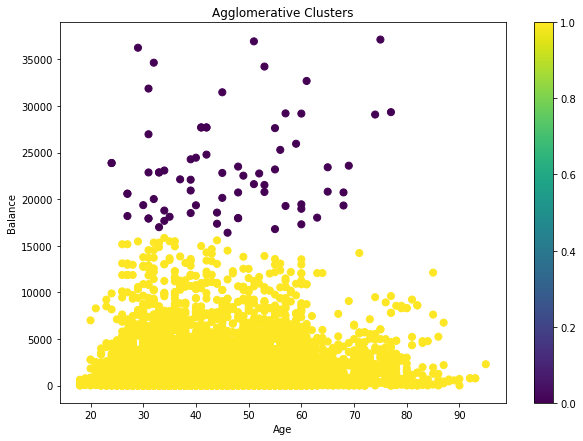

In [ ]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_clust['age'], df_clust['balance'], c = agglomerative[0], s = 50)
ax.set_title('Agglomerative Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
plt.colorbar(scatter);

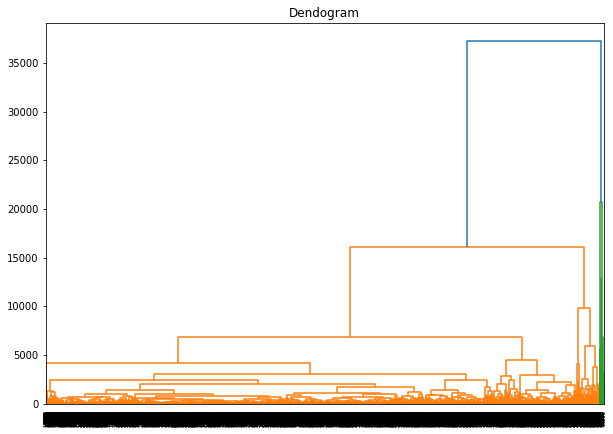

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df_clust, method = 'complete'))

# **K-means**

In [ ]:
from sklearn.cluster import KMeans
sum = []
k = range(1,15)
for r in k:
  km = KMeans(n_clusters = r)
  km = km.fit(df_clust)
  sum.append(km.inertia_)
  

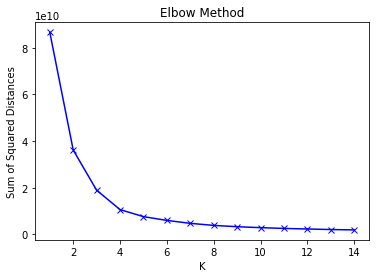

In [ ]:
plt.plot(k, sum, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
km = KMeans(n_clusters = 3)
km = km.fit(df_clust)
sum.append(km.inertia_)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'sin_month', 'cos_month', 'cos_day',
       'sin_day'],
      dtype='object')

In [ ]:
label=pd.DataFrame(km.labels_)

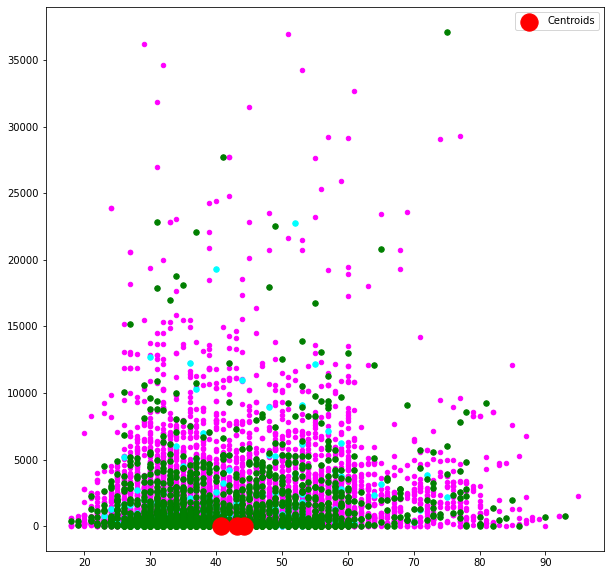

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(df_clust['age'][label[0] == 0], df_clust['balance'][label[0] == 0], s = 20, c ='magenta')
plt.scatter(df_clust['age'][label[0] == 1], df_clust['balance'][label[0] == 1], s = 30, c ='cyan')
plt.scatter(df_clust['age'][label[0] == 2], df_clust['balance'][label[0] == 2], s = 30, c ='green')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.legend();

# **Linear Regression | train_test_split Method**

In [ ]:
df = df[df['deposit'] == 1]

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,sin_month,cos_month,cos_day,sin_day
2,39,4,2,2,0,2454,1,0,0,4,...,716,3,263,2,0,1,5.000000e-01,-8.660254e-01,0.688967,0.724793
6,54,9,1,1,0,0,0,0,1,5,...,744,3,1,0,3,1,8.660254e-01,5.000000e-01,0.528964,0.848644
7,48,1,1,1,0,1730,1,0,0,4,...,361,1,89,3,2,1,5.000000e-01,-8.660254e-01,0.688967,0.724793
8,29,4,2,3,0,560,0,0,0,5,...,459,1,307,1,0,1,1.224647e-16,-1.000000e+00,0.528964,0.848644
10,44,10,0,2,0,0,0,0,0,5,...,1960,3,1,0,3,1,-8.660254e-01,5.000000e-01,0.528964,0.848644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,38,4,2,2,0,104,1,0,0,6,...,606,3,1,0,3,1,5.000000e-01,-8.660254e-01,0.347305,0.937752
8365,55,7,0,1,0,0,0,0,0,27,...,262,6,193,4,2,1,-1.000000e+00,-1.836970e-16,0.688967,-0.724793
8366,52,4,1,2,0,388,0,0,0,25,...,272,1,1,0,3,1,5.000000e-01,-8.660254e-01,0.347305,-0.937752
8367,39,7,1,1,0,2758,0,0,0,4,...,658,3,1,0,3,1,8.660254e-01,5.000000e-01,0.688967,0.724793


In [ ]:
x = df['balance'].values[:, np.newaxis]
y = df['age'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 40)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print("MSE", mean_squared_error(y_test, y_pred))
print('R squared', metrics.r2_score(y_test, y_pred))

MSE 177.31174349977314
R squared 0.014097018056134614


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


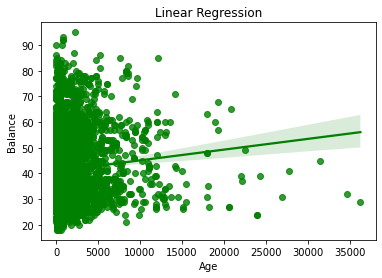

In [ ]:
sns.regplot(x,y, color = 'g')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Balance');

# **Linear Regression | Cross Validation Method**

In [ ]:
x = df['balance'].values[:, np.newaxis]
y = df['age'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
scores = cross_val_score(model, x, y, cv = 5)
print('Average accuracy', np.sum(scores/5))

Average accuracy 0.006040324551998299


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Balance')

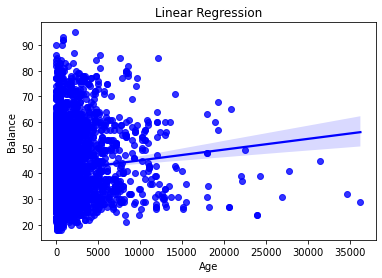

In [ ]:
sns.regplot(x,y, color = 'b')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Balance')

# **Multi-Linear Regression | train_test_split Method**

In [ ]:
x = df[['balance', 'marital', 'duration']].values
y = df['age'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 40)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print("MSE", mean_squared_error(y_test, y_pred))
print('R squared', metrics.r2_score(y_test, y_pred))

MSE 135.63185602121098
R squared 0.2458488723953921


# **Multi-Linear Regression | Cross Validation Method**

In [ ]:
for i in range(2,15):
  scores = cross_val_score(model, x, y, cv = i)
  print('Average accuracy', int(round(np.sum(scores/i) * 100, 1)), '%')

Average accuracy 26 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 26 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %
Average accuracy 25 %


# **Polynomial Regression**

In [ ]:
x = df['balance'].values[:, np.newaxis]
y = df['age'].values

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 40)
x_train_fit = poly.fit_transform(x_train)
model.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
y_pred = model.predict(x_test_)
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('Rsquared', metrics.r2_score(y_test, y_pred))

MSE 175.1813402423425
Rsquared 0.02594265717053701


**The best polynomial degree is 2**

# **Multi-Polynomial Regression**

In [ ]:
x = df[['balance', 'marital', 'education']].values
y = df['age'].values

In [ ]:
poly = PolynomialFeatures(degree = 3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.35, random_state = 45)
x_train_fit = poly.fit_transform(x_train)
model.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
y_pred = model.predict(x_test_)
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('Rsquared', metrics.r2_score(y_test, y_pred))

MSE 120.2527538148908
Rsquared 0.31349174781672184


# **Association**

In [ ]:
df_ass

,education,job,marital,contact,poutcome
0,tertiary,technician,married,cellular,success
1,primary,housemaid,married,cellular,unknown
2,tertiary,management,single,cellular,failure
3,primary,blue-collar,married,cellular,unknown
4,secondary,services,married,cellular,failure
...,...,...,...,...,...
2786,tertiary,management,single,cellular,unknown
2787,tertiary,management,single,cellular,unknown
2788,secondary,admin.,divorced,cellular,unknown
2789,unknown,student,single,cellular,unknown


In [ ]:
df_ass = df_ass.to_numpy()

In [ ]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df_ass).transform(df_ass)
df_ass = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df_ass

,admin.,blue-collar,cellular,divorced,entrepreneur,failure,housemaid,management,married,other,...,self-employed,services,single,student,success,technician,telephone,tertiary,unemployed,unknown
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,True,False,True,False,False
1,False,False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
11158,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
11159,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11160,False,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True


### **Support**

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemset = apriori(df_ass, min_support = 0.4, use_colnames=True)

### **Confidence**

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemset, metric = 'confidence', min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(unknown),(cellular),0.760348,0.720480,0.497939,0.654884,0.908955,-0.049876,0.809930
1,(cellular),(unknown),0.720480,0.760348,0.497939,0.691122,0.908955,-0.049876,0.775879
2,(unknown),(married),0.760348,0.568984,0.435764,0.573112,1.007255,0.003139,1.009669
3,(married),(unknown),0.568984,0.760348,0.435764,0.765864,1.007255,0.003139,1.023559


### **Lift**

In [ ]:
association_rules(frequent_itemset, metric = 'lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(unknown),(married),0.760348,0.568984,0.435764,0.573112,1.007255,0.003139,1.009669
1,(married),(unknown),0.568984,0.760348,0.435764,0.765864,1.007255,0.003139,1.023559
